In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [42]:
import pandas
df = pandas.read_csv('bank.csv')
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [43]:
df = df.iloc[:,:6]
df = df.drop(columns='default')
df = df[df['balance'] > 0]
df.head()

,age,job,marital,education,balance
0,30,unemployed,married,primary,1787
1,33,services,married,secondary,4789
2,35,management,single,tertiary,1350
3,30,management,married,tertiary,1476
5,35,management,single,tertiary,747


In [44]:
df.duplicated().sum()

25

In [45]:
df = df.drop_duplicates()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 0 to 4520
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3773 non-null   int64 
 1   job        3773 non-null   object
 2   marital    3773 non-null   object
 3   education  3773 non-null   object
 4   balance    3773 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 176.9+ KB


,age,balance
count,3773.000000,3773.000000
mean,41.259210,1722.126690
std,10.699631,3194.873617
min,19.000000,1.000000
25%,33.000000,220.000000
50%,39.000000,657.000000
75%,49.000000,1844.000000
max,87.000000,71188.000000


In [46]:
cont_features = []
cat_features = []

for c in df.columns:
    if df[c].dtype == 'int64':
        cont_features += [c]
    else:
        cat_features += [c]

In [47]:


df[cat_features].nunique()



job          12
marital       3
education     4
dtype: int64

In [48]:
# applying one-hot encoder on categorical features
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[cat_features]))

# adding back indexes
OH_cols.index = df.index

# keeping just the continuous features
df_cont = df.drop(cat_features, axis=1)

# adding back encoded categoricals to continous features
df_OH = pd.concat([df_cont, OH_cols], axis=1)

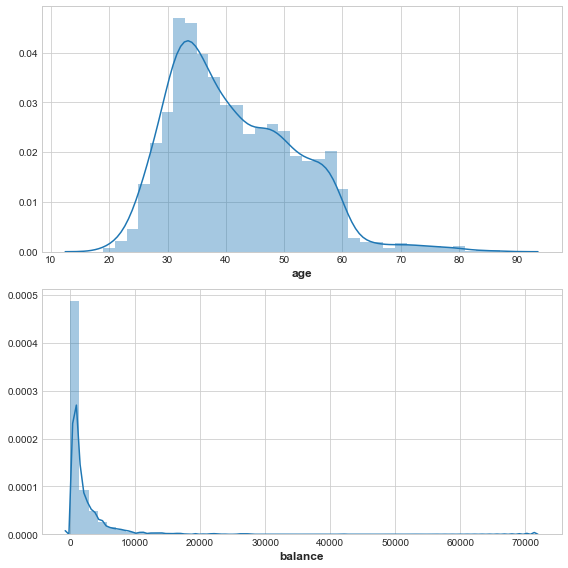

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.distplot(df_OH['age'], ax=ax1)
sns.distplot(df_OH['balance'], ax=ax2)

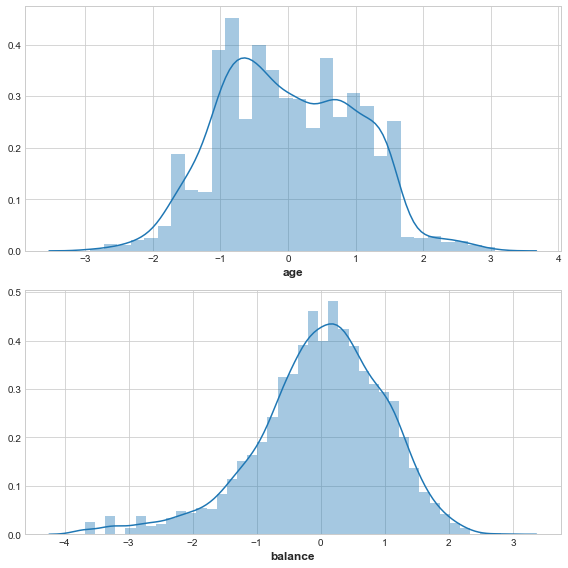

In [50]:
df_OH[cont_features] = np.log(df_OH[cont_features])
scaler = StandardScaler()
df_OH[cont_features] = scaler.fit_transform(df_OH[cont_features])
df[cont_features] = scaler.fit_transform(df[cont_features])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.distplot(df_OH['age'], ax=ax1)
sns.distplot(df_OH['balance'], ax=ax2)


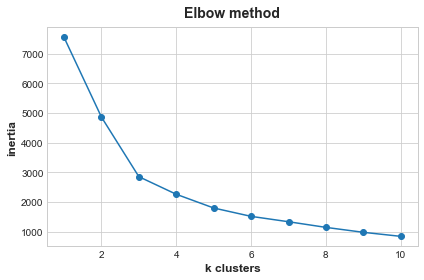

In [51]:
inertia = []

for n_clusters in range(1,11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0, n_init=30, max_iter=100)
    clusters = kmeans.fit_predict(df[cont_features])
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('k clusters')
plt.ylabel('inertia')
plt.show()

In [56]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [58]:
import pandas
df = pandas.read_csv('bank.csv')
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
cols= ['#00876c','#85b96f','#f7e382','#f19452','#d43d51']

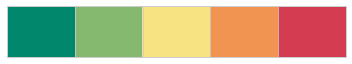

In [60]:
sns.palplot(cols)

AttributeError: module 'seaborn' has no attribute 'histplot'

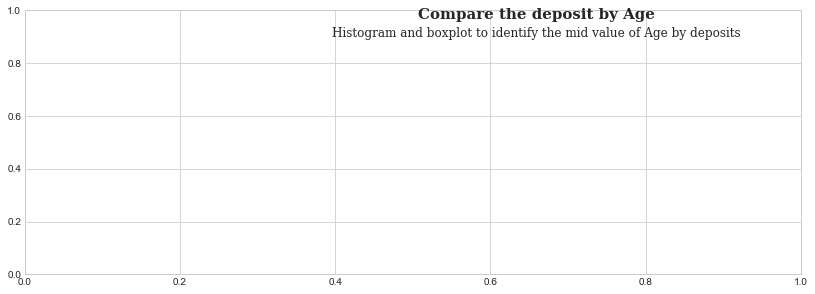

In [62]:
fig=plt.figure(figsize=(15,8), facecolor=(0.2,0.0,0.0,0.0), edgecolor='black')
plt.suptitle("Compare the deposit by Age", family='Serif', size=15,weight='bold')

plt.figtext(0.5,0.93,"Histogram and boxplot to identify the mid value of Age by deposits", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=2, ncols=4, figure=fig)
ax1=plt.subplot(gs[0,:3])


sns.histplot(data=df, x='age', bins=10, ax=ax1, kde=True, hue='y', multiple='layer', element='bars', palette=['#00876c','#d43d51']);
ax2=plt.subplot(gs[0,3:4], sharey=ax1)
sns.histplot(data=df[df['y']=='yes'], x='age', bins=10, ax=ax2, kde=True, color=['#00876c']);
ax2.yaxis.set_visible(False)



ax4=plt.subplot(gs[1,:4])
sns.boxplot(data=df[df['y']=='yes'], x='age', ax=ax4, palette=['#00876c']);
ax4.yaxis.set_visible(False)
ax4.text(60,0.15,"Mean value: {:.2f}".format(df[df['y']=='yes']['age'].mean()))
ax4.text(60,0.20,"Median value: {:.2f}".format(df[df['y']=='yes']['age'].median()))
ax4.text(60,0.25,"Frequent age : {:.2f}".format(df[df['y']=='yes']['age'].mode().max()))
for i in ['left','right','bottom','top']:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)

Text(0.05, -0.05, "Observation:\n Obivous that the single's deposit is less compared to married & divorced.\n Married average age starts from 35+ to 60.\n divorced ages is between 40 to 60 & singel ages is between 28 to 35.\n Reason could be that the single might get married after 35 years approximately")

findfont: Font family ['San'] not found. Falling back to DejaVu Sans.


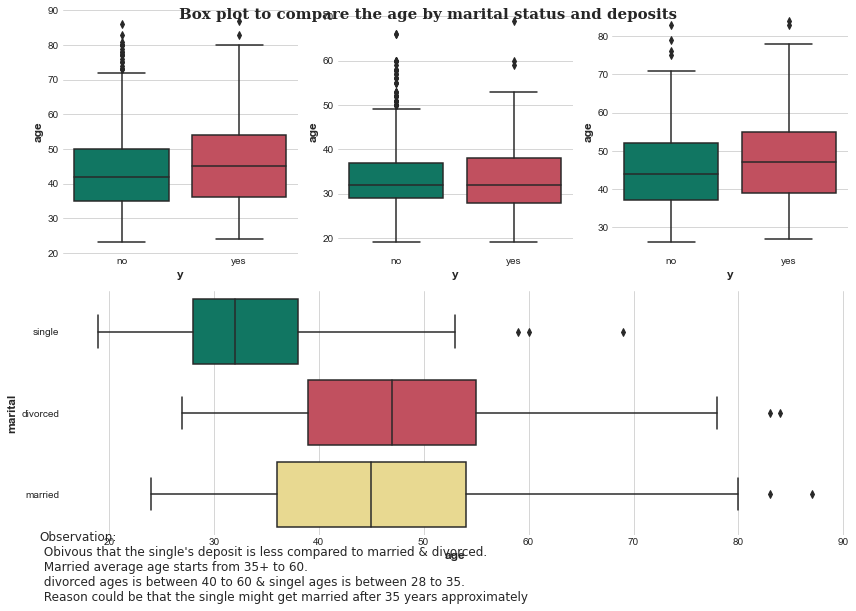

In [63]:
fig = plt.figure(figsize=(12,8))
gs = GridSpec(ncols=3, nrows=2, figure=fig)
plt.suptitle("Box plot to compare the age by marital status and deposits", family='Serif', weight='bold', size=15)
for i,c in enumerate(df['marital'].unique()):
    ax=plt.subplot(gs[0,i])
    ax=sns.boxplot(y=df[df['marital']==c]['age'], x=df['y'],palette=['#00876c','#d43d51']);
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

ax=plt.subplot(gs[1,:])
ax=sns.boxplot(data=df[df['y']=='yes'],y='marital',x='age', palette=['#00876c','#d43d51','#f7e382'])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.figtext(0.05,-0.05,"Observation:\n Obivous that the single's deposit is less compared to married & divorced.\n Married average age starts from 35+ to 60.\n divorced ages is between 40 to 60 & singel ages is between 28 to 35.\n Reason could be that the single might get married after 35 years approximately",
           family='San', size=12, ha='left')

AttributeError: 'Text' object has no property 'font'

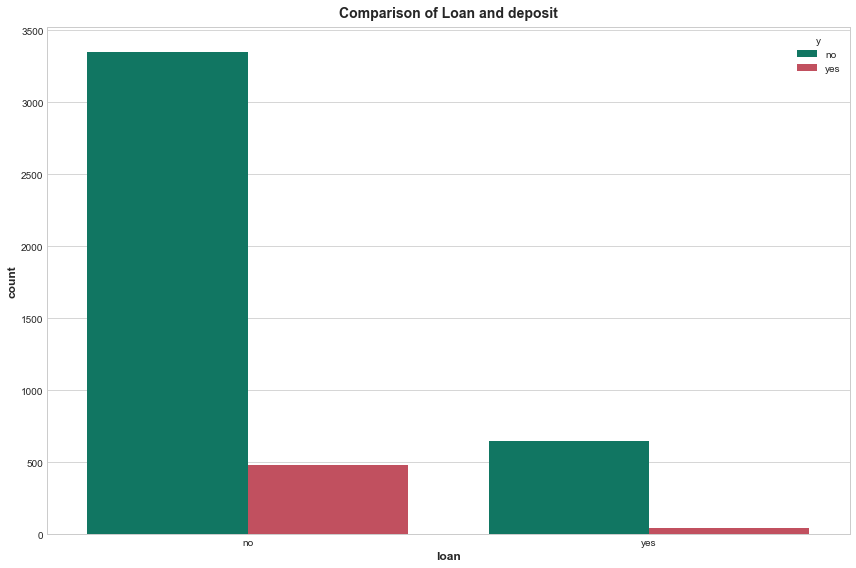

In [64]:
fig = plt.figure(figsize=(12,8))
ax=sns.countplot(data=df, x='loan', hue='y', palette=['#00876c','#d43d51'])
ax.set_title('Comparison of Loan and deposit', font='Serif', weight='bold', size=15)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.figtext(0.05,-0.05,"Observation: People who has loan, have not deposited",
           family='San', size=12, ha='left')

Text(0.05, -0.05, 'Observation:\n Loan has bigger impact on the deposits, people who has loans has less deposits.')

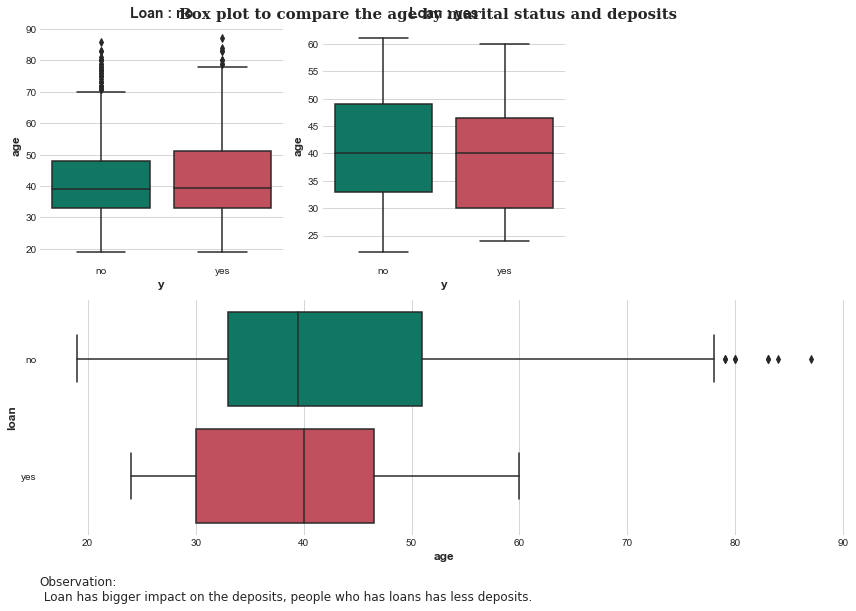

In [66]:


fig = plt.figure(figsize=(12,8))
gs = GridSpec(ncols=3, nrows=2, figure=fig)
plt.suptitle("Box plot to compare the age by marital status and deposits", family='Serif', weight='bold', size=15)
for i,c in enumerate(df['loan'].unique()):
    ax=plt.subplot(gs[0,i])
    ax=sns.boxplot(y=df[df['loan']==c]['age'], x=df['y'],palette=['#00876c','#d43d51']);
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title("Loan : {}".format(c))

ax=plt.subplot(gs[1,:])
ax=sns.boxplot(data=df[df['y']=='yes'],y='loan',x='age', palette=['#00876c','#d43d51','#f7e382'])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.figtext(0.05,-0.05,"Observation:\n Loan has bigger impact on the deposits, people who has loans has less deposits.",
           family='San', size=12, ha='left')



Text(0.05, -0.05, 'Observation: Balance in deposit increases by Age')

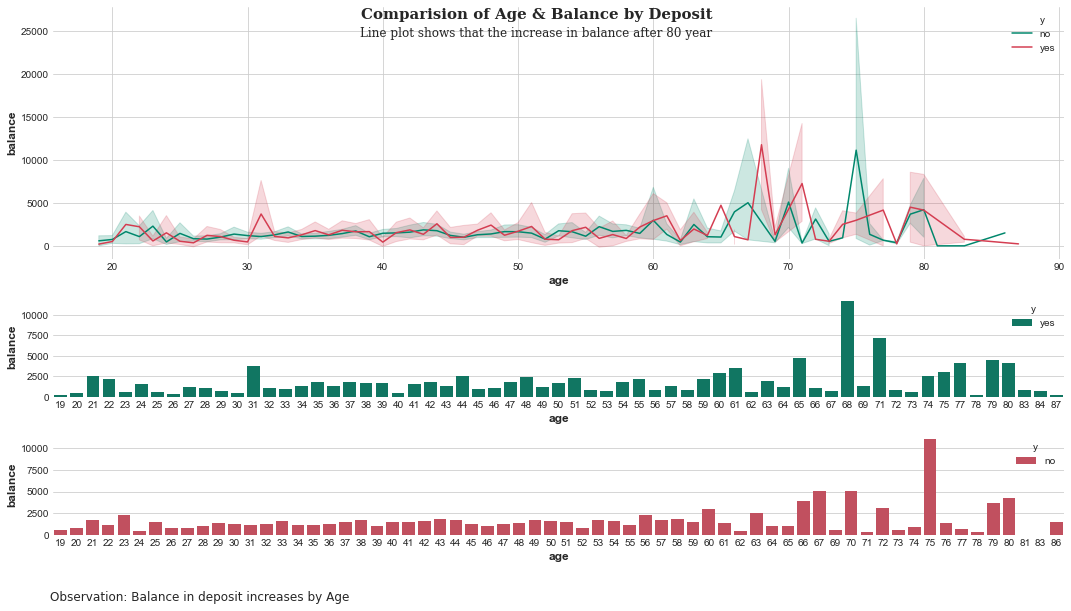

In [71]:
fig=plt.figure(figsize=(15,8))

plt.suptitle("Comparision of Age & Balance by Deposit", family='Serif', size=15, ha='center', weight='bold')
plt.figtext(0.5,0.93,"Line plot shows that the increase in balance after 80 year", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=3, ncols=1, height_ratios=[5,2,2])
ax1=plt.subplot(gs[0,0])
ax1=sns.lineplot(data=df,y='balance',x='age', hue='y',palette=['#00876c','#d43d51'])
ax2=plt.subplot(gs[1,0])
ax2=sns.barplot(data=df[df['y']=='yes'],y='balance',x='age', hue='y', palette=['#00876c'], ci=False)
ax3=plt.subplot(gs[2,0])
ax3=sns.barplot(data=df[df['y']=='no'],y='balance',x='age', hue='y', palette=['#d43d51'], ci=False)
for i in ['left','right','bottom','top']:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
plt.figtext(0.05,-0.05,"Observation: Balance in deposit increases by Age",
           family='San', size=12, ha='left')

Text(0.05, -0.05, 'Observation: Education level Secondary & Tertiary has higher balance')

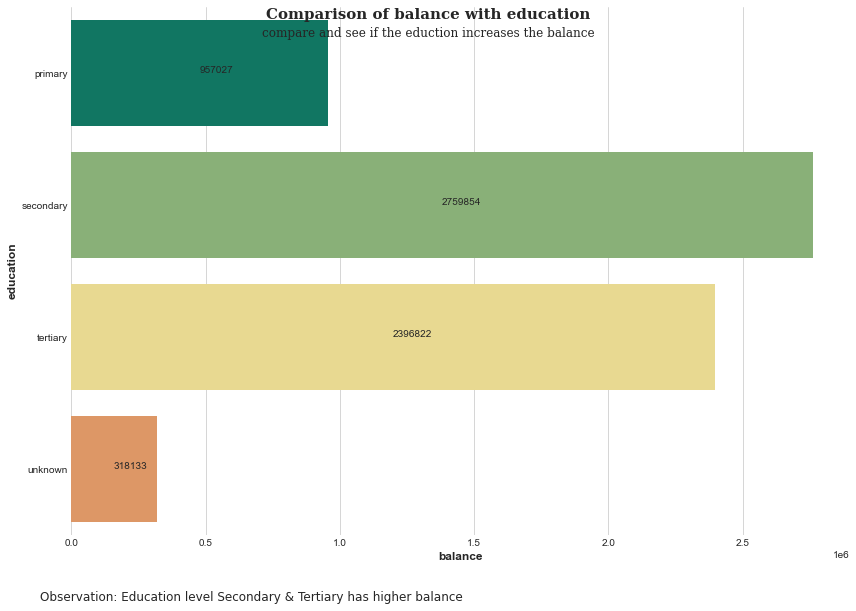

In [72]:
ig = plt.figure(figsize=(12,8))
df1=df.groupby('education')['balance'].sum().reset_index()
plt.suptitle("Comparison of balance with education", family='Serif', size=15, ha='center', weight='bold')
plt.figtext(0.5,0.93,"compare and see if the eduction increases the balance", family='Serif', size=12, ha='center')
ax=sns.barplot(data=df1, y='education',x='balance', palette=cols, ci=False)
#ax.set_xlim(0,20000)
for i in ['left','right','bottom','top']:
    ax.spines[i].set_visible(False)

for y,x in enumerate(df1['balance']):
    ax.text(x=x/2,y=y, s=x)

plt.figtext(0.05,-0.05,"Observation: Education level Secondary & Tertiary has higher balance",
           family='San', size=12, ha='left')

In [74]:

import numpy as np
num_plot(df_clean, 'age', 'Age Distribution', 'y')



NameError: name 'num_plot' is not defined